In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ROCAUC
import lightgbm

C:\Users\nilso\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
tmdb1 = pd.read_csv('tmdb_5000_movies.csv')
tmdb2 = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
tmdb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [4]:
tmdb1.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [5]:
tmdb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [6]:
tmdb2.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
tmdb1.drop(['homepage','status'],axis=1, inplace=True)
tmdb2.drop('title', axis=1, inplace=True)

In [8]:
tmdb = pd.merge(tmdb1, tmdb2, left_on='id', right_on='movie_id')

In [9]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 21 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
movie_id                4803 non-null int64
cast                    4803 non-null ob

In [10]:
tmdb.drop(['id','movie_id','original_title'],axis=1, inplace=True)

In [11]:
tmdb.head(1)

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [12]:
tmdb[tmdb.release_date.isnull()]

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew
4553,0,[],[],en,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],NaN,America Is Still the Place,0.0,0,[],[]


In [13]:
tmdb.drop(index=4553,inplace=True)

In [14]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
keywords                4802 non-null object
original_language       4802 non-null object
overview                4799 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null object
revenue                 4802 non-null int64
runtime                 4800 non-null float64
spoken_languages        4802 non-null object
tagline                 3959 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null int64
cast                    4802 non-null object
crew                    4802 non-null object
dtypes: float64(3), int64(3), object(12)
memory usage: 712.8+ KB


In [15]:
tmdb[tmdb.tagline.isnull()].head()

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",NaN,Superman Returns,5.4,1400,"[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de..."
56,185000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 9663, ""name"": ""sequel""}, {""id"": 9743, ...",en,The USS Enterprise crew explores the furthest ...,65.352913,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-07,343471816,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",NaN,Star Trek Beyond,6.6,2568,"[{""cast_id"": 9, ""character"": ""James T. Kirk"", ...","[{""credit_id"": ""52fe4d489251416c751360bb"", ""de..."
66,175000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...","[{""id"": 965, ""name"": ""age difference""}, {""id"":...",en,Carl Fredricksen spent his entire life dreamin...,92.201962,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,735099082,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",NaN,Up,7.7,6870,"[{""cast_id"": 4, ""character"": ""Carl Fredricksen...","[{""credit_id"": ""5683b5f8c3a3684be90168e1"", ""de..."
78,175000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,After a threat from the tiger Shere Khan force...,94.199316,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2016-04-07,966550600,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",NaN,The Jungle Book,6.7,2892,"[{""cast_id"": 12, ""character"": ""Mowgli"", ""credi...","[{""credit_id"": ""571507b692514105a80032f0"", ""de..."
128,150000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...","[{""id"": 588, ""name"": ""rome""}, {""id"": 716, ""nam...",en,Harvard symbologist Robert Langdon investigate...,67.447636,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}, {""iso_...",2009-05-13,356613439,138.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",NaN,Angels & Demons,6.5,2129,"[{""cast_id"": 4, ""character"": ""Robert Langdon"",...","[{""credit_id"": ""52fe456a9251416c750559ef"", ""de..."


In [16]:
tmdb.loc[tmdb.tagline.isnull(), 'tagline'] = 'NA'

In [17]:
tmdb[tmdb.tagline == 'NA'].head()

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",NA,Superman Returns,5.4,1400,"[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de..."
56,185000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 9663, ""name"": ""sequel""}, {""id"": 9743, ...",en,The USS Enterprise crew explores the furthest ...,65.352913,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-07,343471816,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",NA,Star Trek Beyond,6.6,2568,"[{""cast_id"": 9, ""character"": ""James T. Kirk"", ...","[{""credit_id"": ""52fe4d489251416c751360bb"", ""de..."
66,175000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...","[{""id"": 965, ""name"": ""age difference""}, {""id"":...",en,Carl Fredricksen spent his entire life dreamin...,92.201962,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,735099082,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",NA,Up,7.7,6870,"[{""cast_id"": 4, ""character"": ""Carl Fredricksen...","[{""credit_id"": ""5683b5f8c3a3684be90168e1"", ""de..."
78,175000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,After a threat from the tiger Shere Khan force...,94.199316,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2016-04-07,966550600,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",NA,The Jungle Book,6.7,2892,"[{""cast_id"": 12, ""character"": ""Mowgli"", ""credi...","[{""credit_id"": ""571507b692514105a80032f0"", ""de..."
128,150000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...","[{""id"": 588, ""name"": ""rome""}, {""id"": 716, ""nam...",en,Harvard symbologist Robert Langdon investigate...,67.447636,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}, {""iso_...",2009-05-13,356613439,138.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",NA,Angels & Demons,6.5,2129,"[{""cast_id"": 4, ""character"": ""Robert Langdon"",...","[{""credit_id"": ""52fe456a9251416c750559ef"", ""de..."


In [18]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
keywords                4802 non-null object
original_language       4802 non-null object
overview                4799 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null object
revenue                 4802 non-null int64
runtime                 4800 non-null float64
spoken_languages        4802 non-null object
tagline                 4802 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null int64
cast                    4802 non-null object
crew                    4802 non-null object
dtypes: float64(3), int64(3), object(12)
memory usage: 712.8+ KB


In [19]:
tmdb[tmdb.overview.isnull()] 

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",NA,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],NA,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",[],de,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",NA,Food Chains,7.4,8,[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de..."


In [20]:
tmdb.loc[tmdb.overview.isnull(), 'overview'] = 'NA'

In [21]:
tmdb[tmdb.overview == 'NA']

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,NA,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",NA,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,NA,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],NA,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",[],de,NA,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",NA,Food Chains,7.4,8,[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de..."


In [22]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
keywords                4802 non-null object
original_language       4802 non-null object
overview                4802 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null object
revenue                 4802 non-null int64
runtime                 4800 non-null float64
spoken_languages        4802 non-null object
tagline                 4802 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null int64
cast                    4802 non-null object
crew                    4802 non-null object
dtypes: float64(3), int64(3), object(12)
memory usage: 712.8+ KB


In [23]:
tmdb.release_date = pd.to_datetime(tmdb.release_date, infer_datetime_format=True)

In [24]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
keywords                4802 non-null object
original_language       4802 non-null object
overview                4802 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null datetime64[ns]
revenue                 4802 non-null int64
runtime                 4800 non-null float64
spoken_languages        4802 non-null object
tagline                 4802 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null int64
cast                    4802 non-null object
crew                    4802 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(11)
memory usage: 7

In [25]:
tmdb.head(1)

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [26]:
tmdb.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'title', 'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [27]:
cols_to_drop = ['genres', 'keywords','production_companies', 'release_date',
                'production_countries','spoken_languages', 'cast', 'crew','overview', 'title', 'tagline']

In [28]:
analysis_tmdb = tmdb.drop(cols_to_drop,axis=1)

In [29]:
analysis_tmdb.head(1)

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count
0,237000000,en,150.437577,2787965087,162.0,7.2,11800


In [30]:
lan_val = analysis_tmdb.original_language.value_counts()
lan_val[lan_val < 14].index

Index(['cn', 'ru', 'ko', 'pt', 'da', 'sv', 'fa', 'nl', 'he', 'th', 'ar', 'ro',
       'ta', 'id', 'cs', 'sl', 'af', 'el', 'hu', 'pl', 'nb', 'xx', 'tr', 'ps',
       'vi', 'ky', 'is', 'no', 'te'],
      dtype='object')

In [31]:
analysis_tmdb.loc[analysis_tmdb.original_language.isin(lan_val[lan_val < 14].index), 'original_language'] = 'other'

In [32]:
analysis_tmdb.original_language.value_counts()

en       4504
other      93
fr         70
es         32
zh         27
de         27
hi         19
ja         16
it         14
Name: original_language, dtype: int64

In [33]:
analysis_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 7 columns):
budget               4802 non-null int64
original_language    4802 non-null object
popularity           4802 non-null float64
revenue              4802 non-null int64
runtime              4800 non-null float64
vote_average         4802 non-null float64
vote_count           4802 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 300.1+ KB


In [34]:
analysis_tmdb['budget'].value_counts().sort_index(ascending=False).tail(23)

7000       1
650        1
500        1
250        2
218        1
200        1
110        1
108        1
100        1
30         1
28         1
25         1
15         1
13         1
11         1
10         3
8          1
7          2
4          2
3          1
2          1
1          7
0       1036
Name: budget, dtype: int64

In [35]:
analysis_tmdb.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4802.0,2.905109e+07,4.072447e+07,0.000000,800000.000000,1.500000e+07,4.000000e+07,3.800000e+08
popularity,4802.0,2.149678e+01,3.181845e+01,0.000372,4.671734,1.292493e+01,2.833202e+01,8.755813e+02
revenue,4802.0,8.227777e+07,1.628697e+08,0.000000,0.000000,1.917498e+07,9.291920e+07,2.787965e+09
runtime,4800.0,1.068981e+02,2.256159e+01,0.000000,94.000000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4802.0,6.093440e+00,1.191496e+00,0.000000,5.600000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4802.0,6.903617e+02,1.234674e+03,0.000000,54.000000,2.355000e+02,7.370000e+02,1.375200e+04


In [36]:
# Definido que os budgets inferiores a 7000 USD possuem algum problema

In [37]:
idx_drop = analysis_tmdb[analysis_tmdb.budget < 7000].index

In [38]:
analysis_tmdb.drop(index=idx_drop, inplace=True)

In [39]:
analysis_tmdb[analysis_tmdb.budget < 7000]

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count


In [40]:
analysis_tmdb['revenue'].value_counts().sort_index(ascending=False).tail(50)

113783      1
111731      1
111300      1
108348      1
107559      1
103735      1
99000       1
98017       1
95000       1
78396       1
76382       1
73706       1
71904       1
69497       1
66351       1
62852       1
56825       1
54207       1
53086       1
46495       1
46488       1
45779       1
45000       1
44462       1
40542       1
33245       1
32251       1
32000       1
31081       1
30905       1
30471       1
25000       1
23000       1
22000       1
20380       1
17479       1
17472       1
14873       1
10508       1
10018       1
10000       1
9069        1
7202        1
6399        1
3330        1
46          1
23          1
12          2
7           1
0         518
Name: revenue, dtype: int64

In [41]:
analysis_tmdb['vote_average_enc'] = analysis_tmdb.vote_average >= 7

In [42]:
analysis_tmdb['vote_average_enc'] = analysis_tmdb.vote_average < 7

In [43]:
analysis_tmdb

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,vote_average_enc
0,237000000,en,150.437577,2787965087,162.0,7.2,11800,False
1,300000000,en,139.082615,961000000,169.0,6.9,4500,True
2,245000000,en,107.376788,880674609,148.0,6.3,4466,True
3,250000000,en,112.312950,1084939099,165.0,7.6,9106,False
4,260000000,en,43.926995,284139100,132.0,6.1,2124,True
...,...,...,...,...,...,...,...,...
4788,12000,en,4.553644,6000000,93.0,6.2,110,True
4792,20000,ja,0.212443,99000,111.0,7.4,63,False
4796,7000,en,23.307949,424760,77.0,6.9,658,True
4798,220000,es,14.269792,2040920,81.0,6.6,238,True


In [44]:
analysis_tmdb.dropna()

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,vote_average_enc
0,237000000,en,150.437577,2787965087,162.0,7.2,11800,False
1,300000000,en,139.082615,961000000,169.0,6.9,4500,True
2,245000000,en,107.376788,880674609,148.0,6.3,4466,True
3,250000000,en,112.312950,1084939099,165.0,7.6,9106,False
4,260000000,en,43.926995,284139100,132.0,6.1,2124,True
...,...,...,...,...,...,...,...,...
4788,12000,en,4.553644,6000000,93.0,6.2,110,True
4792,20000,ja,0.212443,99000,111.0,7.4,63,False
4796,7000,en,23.307949,424760,77.0,6.9,658,True
4798,220000,es,14.269792,2040920,81.0,6.6,238,True


In [45]:
analysis_tmdb.dropna(inplace=True)

In [46]:
analysis_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733 entries, 0 to 4799
Data columns (total 8 columns):
budget               3733 non-null int64
original_language    3733 non-null object
popularity           3733 non-null float64
revenue              3733 non-null int64
runtime              3733 non-null float64
vote_average         3733 non-null float64
vote_count           3733 non-null int64
vote_average_enc     3733 non-null bool
dtypes: bool(1), float64(3), int64(3), object(1)
memory usage: 237.0+ KB


In [47]:
X = analysis_tmdb.drop(['vote_average', 'vote_average_enc'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = analysis_tmdb.vote_average_enc

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [49]:
model = LogisticRegressionCV()
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

C:\Users\nilso\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


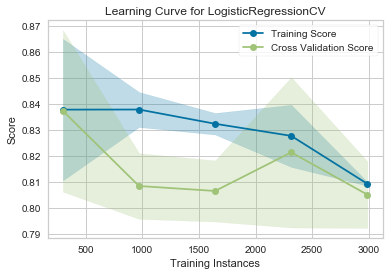

In [50]:
lc = LearningCurve(model,scoring='precision', random_state=42)
lc.fit(X,y)
lc.show()

In [51]:
y_train.mean()

0.768921634293369

In [53]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [54]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       False       0.49      0.36      0.42       690
        True       0.82      0.89      0.85      2296

    accuracy                           0.77      2986
   macro avg       0.66      0.63      0.64      2986
weighted avg       0.75      0.77      0.75      2986



In [55]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.49      0.42      0.45       142
        True       0.87      0.90      0.88       605

    accuracy                           0.81       747
   macro avg       0.68      0.66      0.67       747
weighted avg       0.80      0.81      0.80       747



In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.7309160749621698

C:\Users\nilso\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


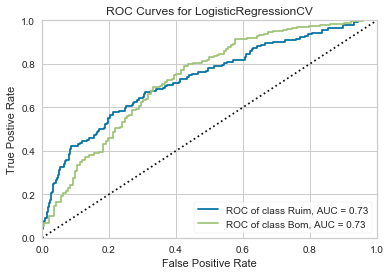

In [58]:
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model, classes=["Ruim", "Bom"], micro=False, macro=False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

# Lightgbm


In [88]:
np.linspace(0.1,1,5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [89]:
params_dict = {'learning_rate': np.linspace(0.1,1,5), 'max_depth': [1, 2, 4, 10], 'n_estimators': [100, 500, 1000]}

C:\Users\nilso\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


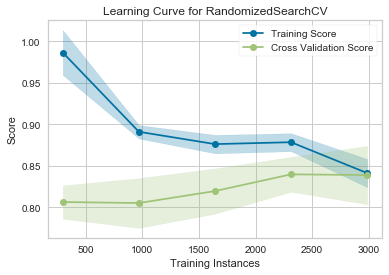

C:\Users\nilso\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


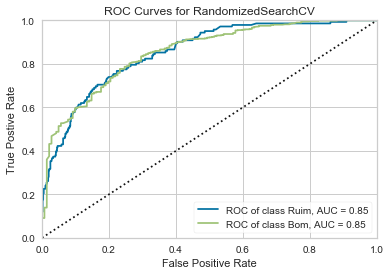

In [90]:
model = RandomizedSearchCV(lightgbm.LGBMClassifier(), param_distributions=params_dict, random_state=42)
model.fit(X_train, y_train)

lc = LearningCurve(model,scoring='precision', random_state=42)
lc.fit(X,y)
lc.show()

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model, classes=["Ruim", "Bom"], micro=False, macro=False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [95]:
model.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.325, max_depth=1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [91]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       False       0.78      0.47      0.59       690
        True       0.86      0.96      0.91      2296

    accuracy                           0.85      2986
   macro avg       0.82      0.72      0.75      2986
weighted avg       0.84      0.85      0.83      2986



In [92]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.68      0.42      0.52       142
        True       0.87      0.95      0.91       605

    accuracy                           0.85       747
   macro avg       0.78      0.68      0.71       747
weighted avg       0.84      0.85      0.84       747



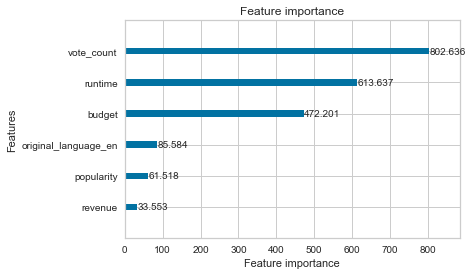

In [94]:
lightgbm.plot_importance(model.best_estimator_, importance_type='gain')